SPACEX FALCON 9 FIRST STAGE LANDING PREDICTION

LAB1: COLLECTING THE DATA

Objectives:
    Request to the SpaceX API
    Clean the requested data

In [57]:
import requests
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [58]:
def getBoosterVersion(data):
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
            BoosterVersion.append(response['name'])

In [59]:
def getLaunchSite(data):
    for x in data['launchpad']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

In [60]:
def getPayLoadData(data):
    for load in data['payloads']:
        if load:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

In [61]:
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [62]:
spacex_url = "https://api.spacexdata.com/v4/launches/past"

In [63]:
response = requests.get(spacex_url)

In [64]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

In [65]:
static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [66]:
response = requests.get(static_json_url)

In [67]:
response.status_code

200

In [68]:
df = response.json()

In [69]:
data = pd.json_normalize(df)

In [70]:
data.head()

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,True,"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,True,[],4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_succes

In [71]:
#Lets take a subset of our dataframe 
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

#Remove rows with multiple cores
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

#Since payloads and cores are lists of size 1, we will also extract the single value in the list and replace the feature
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x: x[0])

#We also want to convert the date_utc to a datetime datatype 
data['date'] = pd.to_datetime(data['date_utc']).dt.date

#Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [72]:
#Global variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [73]:
getBoosterVersion(data)

In [74]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [75]:
getLaunchSite(data)

In [76]:
getPayLoadData(data)

In [77]:
getCoreData(data)

In [78]:
launch_dict = {'FlightNumber': list(data['flight_number']),
               'Date': list(data['date']),
               'BoosterVersion': BoosterVersion,
               'PayloadMass': PayloadMass,
               'Orbit': Orbit,
               'LaunchSite': LaunchSite,
               'Outcome': Outcome,
               'Flights': Flights,
               'GridFins': GridFins,
               'Reused': Reused,
               'Legs': Legs,
               'LandingPad': LandingPad,
               'Block': Block,
               'ReusedCount': ReusedCount,
               'Serial': Serial,
               'Longitude': Longitude,
               'Latitude': Latitude
}

In [79]:
data = pd.DataFrame(launch_dict)

In [80]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [81]:
data_falcon9 = data[data['BoosterVersion']!= 'Falcon 1']

In [82]:
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [231]:
data_falcon9.count()

FlightNumber      90
Date              90
BoosterVersion    90
PayloadMass       90
Orbit             90
LaunchSite        90
Outcome           90
Flights           90
GridFins          90
Reused            90
Legs              90
LandingPad        64
Block             90
ReusedCount       90
Serial            90
Longitude         90
Latitude          90
dtype: int64

In [83]:
#Reset the FlightNumber column
data_falcon9.loc[:, 'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9.head()

/var/folders/q3/t1t4149s76l6gyxx097bt7r40000gn/T/ipykernel_26642/3112467833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9.loc[:, 'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


DATA WRANGLING

In [84]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

Dealing with Missing Values

In [85]:
mean_payloadmass = data_falcon9['PayloadMass'].mean()
data_falcon9['PayloadMass'].replace(np.nan, mean_payloadmass, inplace= True)

/var/folders/q3/t1t4149s76l6gyxx097bt7r40000gn/T/ipykernel_26642/752009141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['PayloadMass'].replace(np.nan, mean_payloadmass, inplace= True)


In [86]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [87]:
data_falcon9.to_csv('dataset_part_1.csv', index = False)

WEB SCRAPING FALCON 9 AND FALCON HEAVY LAUNCHES RECORDS FROM WIKIPEDIA

In [89]:
%pip install beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


In [90]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [91]:
def date_time(table_cells):
    #This function returns the data and time from the HTML table cell
    #Input: the element of a table data cell extracts extra row
    return [data_time.strip() for data_time in list (table_cells.strings)][0:2]

def booster_version(table_cells):
    #This function returns the booster version from the HTML table cell
    #Input: the element of a table data cell extracts extra row

    out = ''.join([booster_version for i, booster_version in enumerate(table_cells.strings) if i%2 ==0][0: -1])
    return out

def landing_status(table_cells):
    #This function returns the landing status from the HTML table cell
    #Input: the element of a table data cell extracts extra row
    out = [i for i in table_cells.strings][0]
    return out

def get_mass(table_cells):
    mass = unicodedata.normalize('NFKD', table_cells.text).strip()
    if mass:
        mass.find('kg')
        new_mass = mass[0:mass.find('kg')+2]
    else:
        new_mass = 0
    return new_mass

def extract_column_from_header(row):
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()

    column_name = ' '.join(row.contents)

    #Filter the digit and empty names
    if not (column_name.strip().isdigit()):
        column_name = column_name.strip()
        return column_name
        

In [92]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [103]:
response = requests.get(static_url)
page_content = response.content

In [108]:
soup = BeautifulSoup(page_content, 'html.parser')

In [109]:
page_title = soup.title.text

In [110]:
print(page_title)

List of Falcon 9 and Falcon Heavy launches - Wikipedia


In [116]:
html_tables = soup.find_all('table')

In [117]:
html_tables

[<table class="multicol" role="presentation" style="border-collapse: collapse; padding: 0; border: 0; background:transparent; width:100%;">
 <tbody><tr>
 <td style="text-align: left; vertical-align: top;">
 <h3><span class="mw-headline" id="Rocket_configurations">Rocket configurations</span></h3>
 <div class="chart noresize" style="margin-top:1em;max-width:420px;">
 <div style="position:relative;min-height:320px;min-width:420px;max-width:420px;">
 <div style="float:right;position:relative;min-height:240px;min-width:320px;max-width:320px;border-left:1px black solid;border-bottom:1px black solid;">
 <div style="position:absolute;left:3px;top:224px;height:15px;min-width:18px;max-width:18px;background-color:LightSteelBlue;-webkit-print-color-adjust:exact;border:1px solid LightSteelBlue;border-bottom:none;overflow:hidden;" title="[[Falcon 9 v1.0]]: 2"></div>
 <div style="position:absolute;left:55px;top:224px;height:15px;min-width:18px;max-width:18px;background-color:LightSteelBlue;-webkit-p

In [219]:
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date andtime ()
</th>
<th scope="col"> 
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launchoutcome
</th>
<th scope="col">
</th></tr>
<tr>
<th rowspan="2" scope="row" style="text-align:center;">1
</th>
<td>4 June 2010,<br/>18:45
</td>
<td><a href="/wiki/Falcon_9_v1.0" title="Falcon 9 v1.0">F9 v1.0</a><sup class="reference" id="cite_ref-MuskMay2012_13-0"><a href="#cite_note-MuskMay2012-13">[7]</a></sup><br/>B0003.1<sup class="reference" id="cite_ref-block_numbers_14-0"><a href="#cite_note-block_numbers-14">[8]</a></sup>
</td>
<td><a href="/wiki/Cape_Canaveral_Space_Force_Station" title="Cape Canaveral Space Force Station">CCAFS</a>,<br/><a href="/wiki/Cape_Canaveral_Space_Launch_Complex_40" title="Cape Canaveral Space Lau

In [220]:
column_names = []
th_element = first_launch_table.find_all('th')
for row in th_element:
    col_name = extract_column_from_header(row)
    if col_name != None:
        if len(col_name)  > 0:
            column_names.append(col_name)
    
   

In [221]:
column_names

['Flight No.',
 'Date and time ( )',
 'Launch site',
 'Payload',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launch outcome']

Create an empty dictionary with keys from the extracted column names

In [222]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [223]:
launch_dict

{'Flight No.': [],
 'Launch site': [],
 'Payload': [],
 'Payload mass': [],
 'Orbit': [],
 'Customer': [],
 'Launch outcome': [],
 'Version Booster': [],
 'Booster landing': [],
 'Date': [],
 'Time': []}

In [224]:
extracted_row = 0
#Extract each table
for table_number, table in enumerate(soup.find_all('table', "wikitable plainrowheaders collapsible")):
    #get table row
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
        else:
            flag = False
       
        #get table element
        row = rows.find_all('td')
        #if it is number save cells in a dictionary
        if flag:
            extracted_row += 1
            #Flight number value
            launch_dict['Flight No.'].append(flight_number)
            print(flight_number)
            datatimelist = date_time(row[0])

            #Date value
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
            print(date)

            #Time value
            time = datatimelist[1]
            launch_dict['Time'].append(time)
            print(time)

            #Booster version
            bv = booster_version(row[1])
            if not(bv):
                bv = row[1].a.string
            launch_dict['Version Booster'].append(bv)
            print(bv)

            #Launch Site
            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site)
            print(launch_site)

            #Payload
            payload = row[3].a.string
            launch_dict['Payload'].append(payload)
            print(payload)

            #Payload Mass
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)
            print(payload_mass)

            #Orbit
            orbit  = row[5].a.string
            launch_dict['Orbit'].append(orbit)
            print(orbit)

            #Customer
            try:
                if row[6].a:
                    customer = row[6].a.string
                    launch_dict['Customer'].append(customer)
                    print(customer)
                else:
                    print('No Data')
            except Exception as e:
                print(f"Error {e}")

            #Launch outcome
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome)
            print(launch_outcome)

            #Booster landing
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)
            print(booster_landing)


1
4 June 2010
18:45
F9 v1.0B0003.1
CCAFS
Dragon Spacecraft Qualification Unit
0
LEO
SpaceX
Success

Failure
2
8 December 2010
15:43
F9 v1.0B0004.1
CCAFS
Dragon
0
LEO
NASA
Success
Failure
3
22 May 2012
07:44
F9 v1.0B0005.1
CCAFS
Dragon
525 kg
LEO
NASA
Success
No attempt

4
8 October 2012
00:35
F9 v1.0B0006.1
CCAFS
SpaceX CRS-1
4,700 kg
LEO
NASA
Success

No attempt
5
1 March 2013
15:10
F9 v1.0B0007.1
CCAFS
SpaceX CRS-2
4,877 kg
LEO
NASA
Success

No attempt

6
29 September 2013
16:00
F9 v1.1B1003
VAFB
CASSIOPE
500 kg
Polar orbit
MDA
Success
Uncontrolled
7
3 December 2013
22:41
F9 v1.1
CCAFS
SES-8
3,170 kg
GTO
SES
Success
No attempt
8
6 January 2014
22:06
F9 v1.1
CCAFS
Thaicom 6
3,325 kg
GTO
Thaicom
Success
No attempt
9
18 April 2014
19:25
F9 v1.1
Cape Canaveral
SpaceX CRS-3
2,296 kg
LEO
NASA
Success

Controlled
10
14 July 2014
15:15
F9 v1.1
Cape Canaveral
Orbcomm-OG2
1,316 kg
LEO
Orbcomm
Success
Controlled
11
5 August 2014
08:00
F9 v1.1
Cape Canaveral
AsiaSat 8
4,535 kg
GTO
AsiaSat
Succes

In [225]:
for key, value in launch_dict.items():
    print(f"Columns {key} has {len(value)} values")

Columns Flight No. has 121 values
Columns Launch site has 121 values
Columns Payload has 121 values
Columns Payload mass has 121 values
Columns Orbit has 121 values
Columns Customer has 120 values
Columns Launch outcome has 121 values
Columns Version Booster has 121 values
Columns Booster landing has 121 values
Columns Date has 121 values
Columns Time has 121 values


In [228]:
df= pd.DataFrame({ key:pd.Series(value,dtype='object') for key, value in launch_dict.items() })

In [229]:
df

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,F9 v1.0B0003.1,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.0B0004.1,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525 kg,LEO,NASA,Success,F9 v1.0B0005.1,No attempt\n,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success\n,F9 v1.0B0006.1,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,F9 v1.0B0007.1,No attempt\n,1 March 2013,15:10
...,...,...,...,...,...,...,...,...,...,...,...
116,117,CCSFS,Starlink,"15,600 kg",LEO,SpaceX,Success\n,F9 B5B1051.10,Success,9 May 2021,06:42
117,118,KSC,Starlink,"~14,000 kg",LEO,SpaceX,Success\n,F9 B5B1058.8,Success,15 May 2021,22:56
118,119,CCSFS,Starlink,"15,600 kg",LEO,NASA,Success\n,F9 B5B1063.2,Success,26 May 2021,18:59
119,120,KSC,SpaceX CRS-22,"3,328 kg",LEO,Sirius XM,Success\n,F9 B5B1067.1,Success,3 June 2021,17:29


In [230]:
df.to_csv('spacex_web_scraped.csv', index = False)

LAB2 : DATA WRANGLING

OBJECTIVES

Perform exploratory Data Analysis and Determine Training Labels

- Exploratory Data Analysis
- Determine Training Labels

In [232]:
df = pd.read_csv('dataset_part_1.csv')

In [233]:
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [234]:
#Identify and calculate the percentage of the missing values in each attribute
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

In [235]:
#Identify which columns are numerical and categorical:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

Task 1: Calculate the number of launches on each site

In [236]:
df['LaunchSite'].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [237]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [240]:
#landing_outcomes = values on Outcome column
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [239]:
for i, Outcome in enumerate(landing_outcomes.keys()):
    print(i, Outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [241]:
bad_outcomes = set(landing_outcomes.keys()[[1,3,5,6,7]])

In [242]:
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [245]:
df['Outcome']

0       None None
1       None None
2       None None
3     False Ocean
4       None None
         ...     
85      True ASDS
86      True ASDS
87      True ASDS
88      True ASDS
89      True ASDS
Name: Outcome, Length: 90, dtype: object

In [252]:
#Creating a landing outcome label from Outcome column
landing_class = []
for row in df['Outcome']:
    if row in bad_outcomes:
        landing_class.append(0)
       
    else:
        landing_class.append(1)

In [253]:
df['Class'] = landing_class

In [254]:
df['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

In [256]:
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [257]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [258]:
df['Class'].mean()

0.6666666666666666

In [259]:
df.to_csv('dataset_part_2.csv', index= False)

SQL NOTEBOOK

In [1]:
%pip install --upgrade SQLAlchemy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext sql

In [3]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [4]:
%sql sqlite:///my_data1.db

In [5]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [6]:
#Remove blank row from table

%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [8]:
#Display the names of the unique launch sites in the space mission
%sql select distinct Launch_Site from SPACEXTABLE

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [20]:
%sql select * from SPACEXTABLE where Launch_Site like 'CCA%' limit 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-04-06,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-08-12,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-08-10,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-01-03,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [23]:
%sql select sum (PAYLOAD_MASS__KG_) from SPACEXTABLE where Customer == 'NASA (CRS)'

 * sqlite:///my_data1.db
Done.


sum (PAYLOAD_MASS__KG_)
45596


In [37]:
%sql select avg(PAYLOAD_MASS__KG_) from SPACEXTABLE where Booster_Version == 'F9 v1.1'

 * sqlite:///my_data1.db
Done.


avg(PAYLOAD_MASS__KG_)
2928.4


In [33]:
%sql select distinct Landing_Outcome from SPACEXTABLE

 * sqlite:///my_data1.db
Done.


Landing_Outcome
Failure (parachute)
No attempt
Uncontrolled (ocean)
Controlled (ocean)
Failure (drone ship)
Precluded (drone ship)
Success (ground pad)
Success (drone ship)
Success
Failure


In [34]:
%sql select min(Date) from SPACEXTABLE where Landing_Outcome == 'Success (ground pad)'

 * sqlite:///my_data1.db
Done.


min(Date)
2015-12-22


In [38]:
%sql select Booster_Version from SPACEXTABLE where PAYLOAD_MASS__KG_ > 4000 AND PAYLOAD_MASS__KG_ < 6000

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 v1.1
F9 v1.1 B1011
F9 v1.1 B1014
F9 v1.1 B1016
F9 FT B1020
F9 FT B1022
F9 FT B1026
F9 FT B1030
F9 FT B1021.2
F9 FT B1032.1


In [40]:
%sql select count(*) from SPACEXTABLE where Landing_Outcome like 'success%'

 * sqlite:///my_data1.db
Done.


count(*)
61


In [41]:
%sql select count(*) from SPACEXTABLE where Landing_Outcome like 'failure%'

 * sqlite:///my_data1.db
Done.


count(*)
10


In [43]:
%sql select Booster_Version from SPACEXTABLE where PAYLOAD_MASS__KG_ == (Select max(PAYLOAD_MASS__KG_) from SPACEXTABLE)

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [68]:
%sql select substr(Date,6,2) as Month, Landing_Outcome, Booster_Version, Launch_Site from SPACEXTABLE where (Landing_Outcome = 'Failure (drone ship)' and substr(Date,1,4)= '2015')

 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site
10,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


In [79]:
%sql select Landing_Outcome, count(Landing_Outcome) as Count from SPACEXTABLE where '2010-06-04'< Date and Date < '2017-03-20' group by Landing_Outcome  order by Count desc

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Count
No attempt,10
Success (ground pad),5
Success (drone ship),5
Failure (drone ship),5
Controlled (ocean),3
Uncontrolled (ocean),2
Precluded (drone ship),1
Failure (parachute),1


### EXPLORING AND PREPARING DATA

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


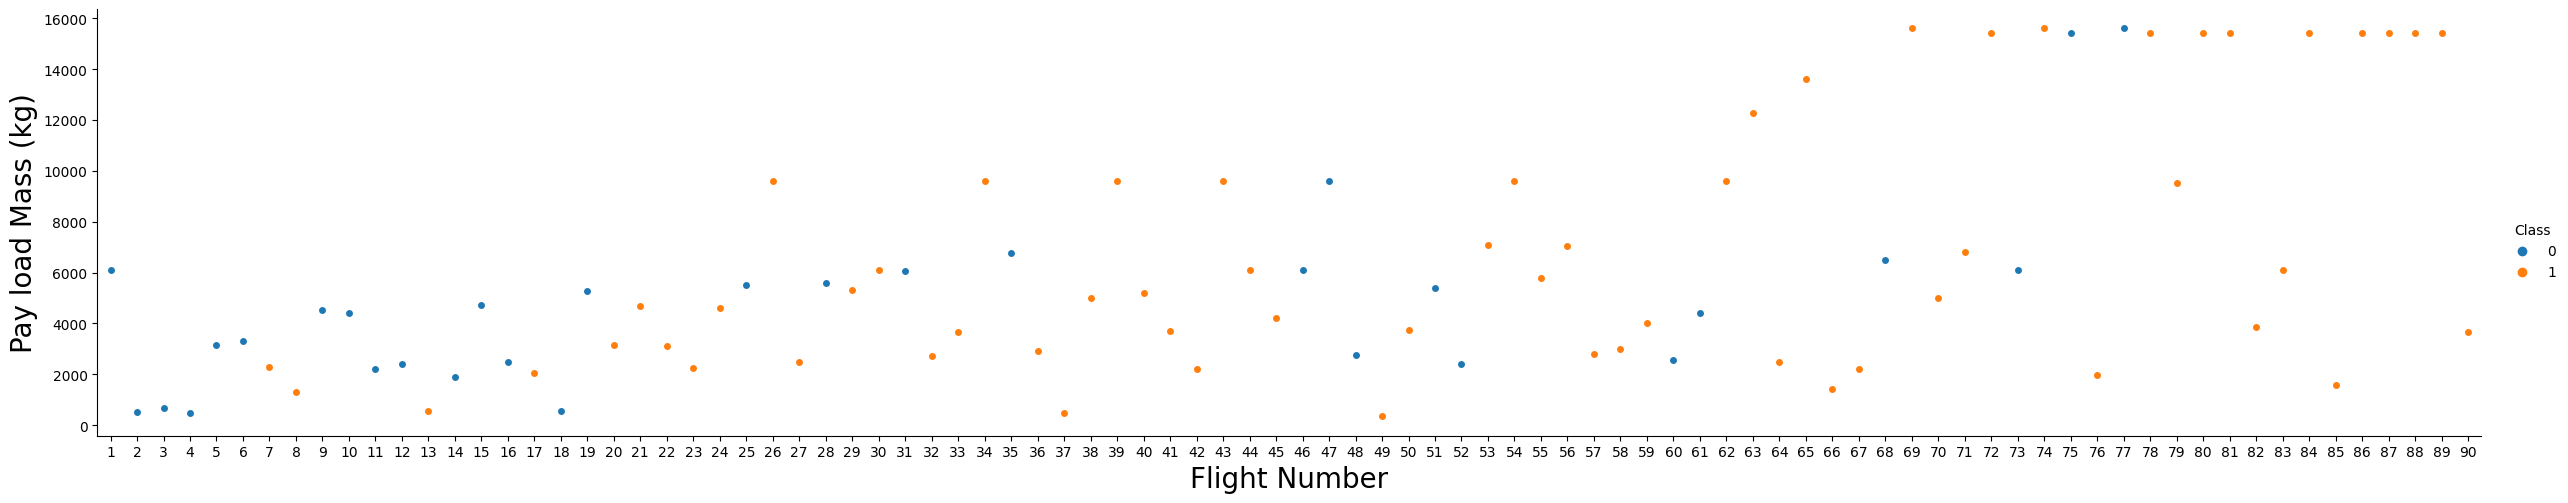

In [89]:
sns.catplot(y= "PayloadMass", x= "FlightNumber", hue = "Class", data = df, aspect = 5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Pay load Mass (kg)", fontsize = 20)
plt.show()

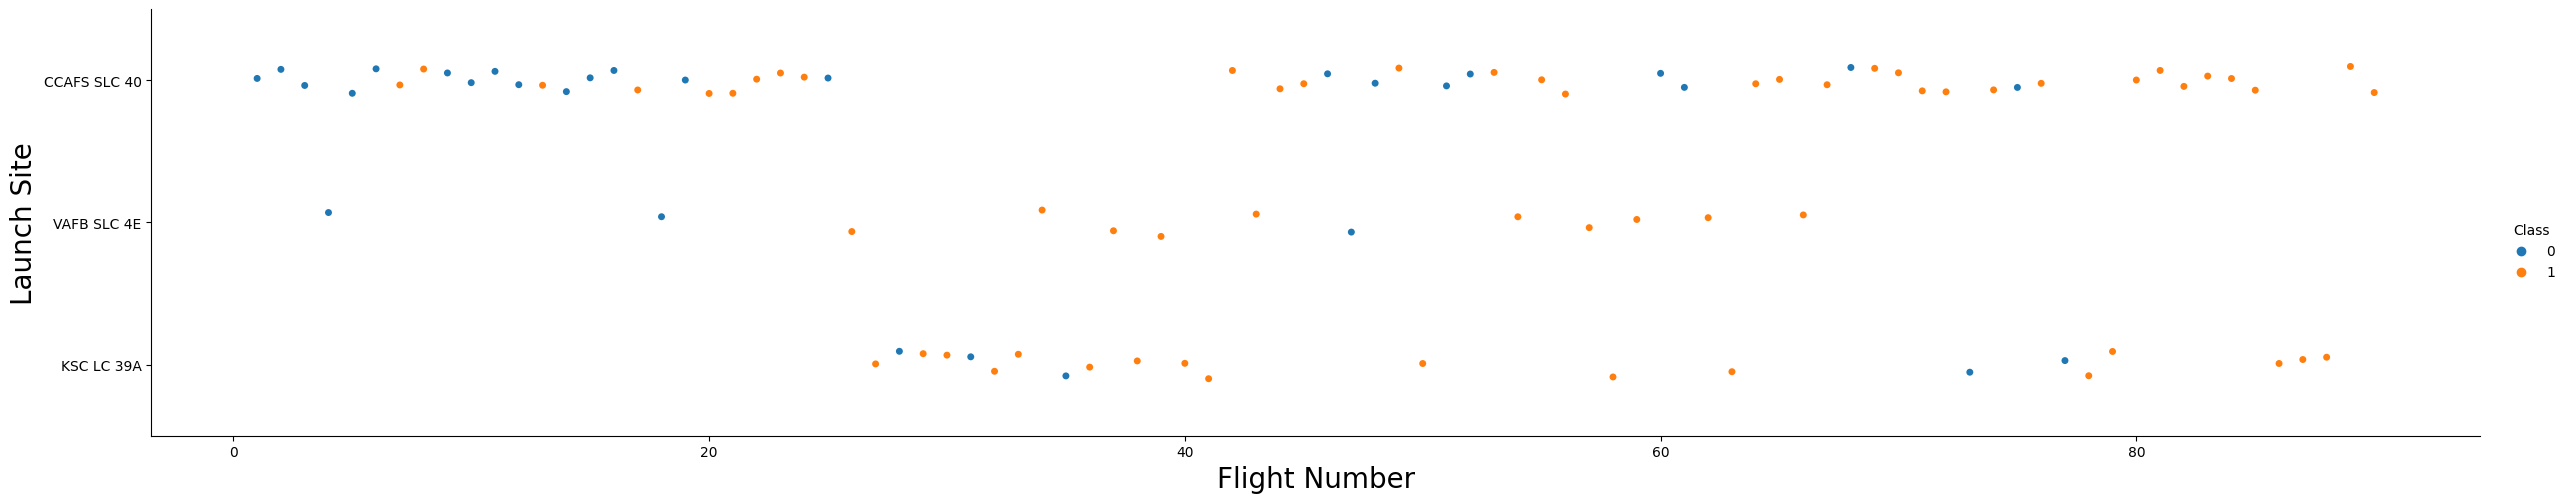

In [90]:
sns.catplot(y = "LaunchSite", x = "FlightNumber", hue = "Class", data = df, aspect= 5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Launch Site", fontsize = 20)
plt.show()

We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60%, therefore, when we look at the chart, the ratio of the dots in class 0 (failure) are more dense compare to the ratio of the dots in class 0 of KSC LC-39A and VAFB SLC 4E. The reason is because the success rate of these two launch sites is higher which the rate of 77%.

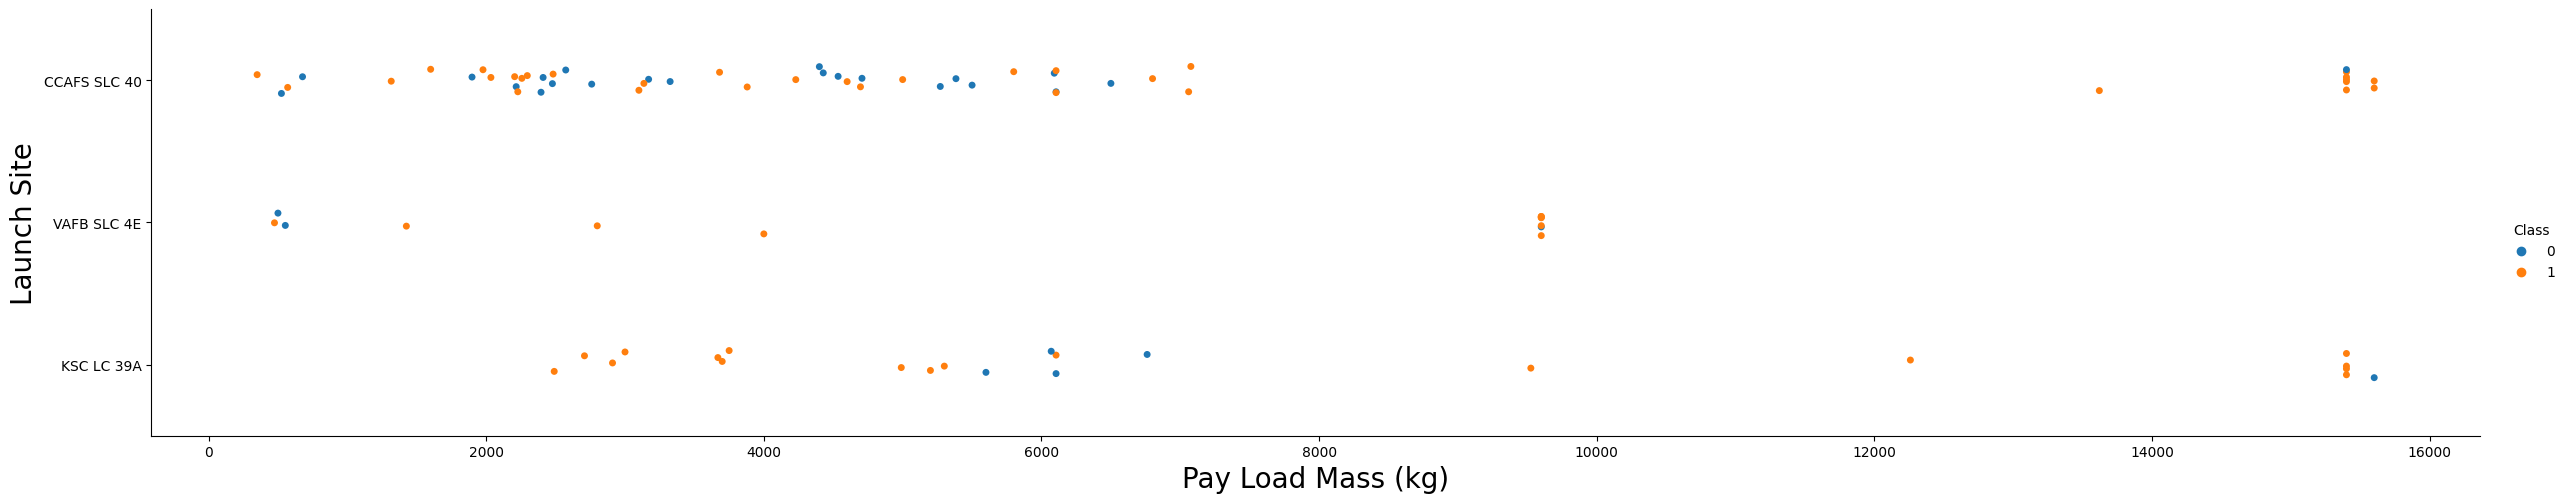

In [91]:
#Relationship between Payload and Launch Site
sns.catplot(x = "PayloadMass", y = "LaunchSite", hue = "Class", data = df, aspect= 5)
plt.xlabel("Pay Load Mass (kg)", fontsize = 20)
plt.ylabel("Launch Site", fontsize = 20)
plt.show()


<AxesSubplot:xlabel='Class', ylabel='Orbit'>

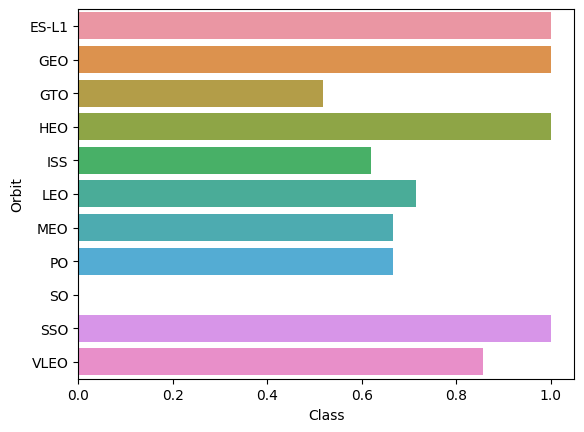

In [97]:
#Create Bar Chart for the success rate of each orbit
df_mean = df.groupby('Orbit')['Class'].mean().reset_index()
sns.barplot(x = 'Class', y = 'Orbit', data = df_mean)

As we can see, ES-L1, GEO, HEO, and SSO orbit has the highest successful rate

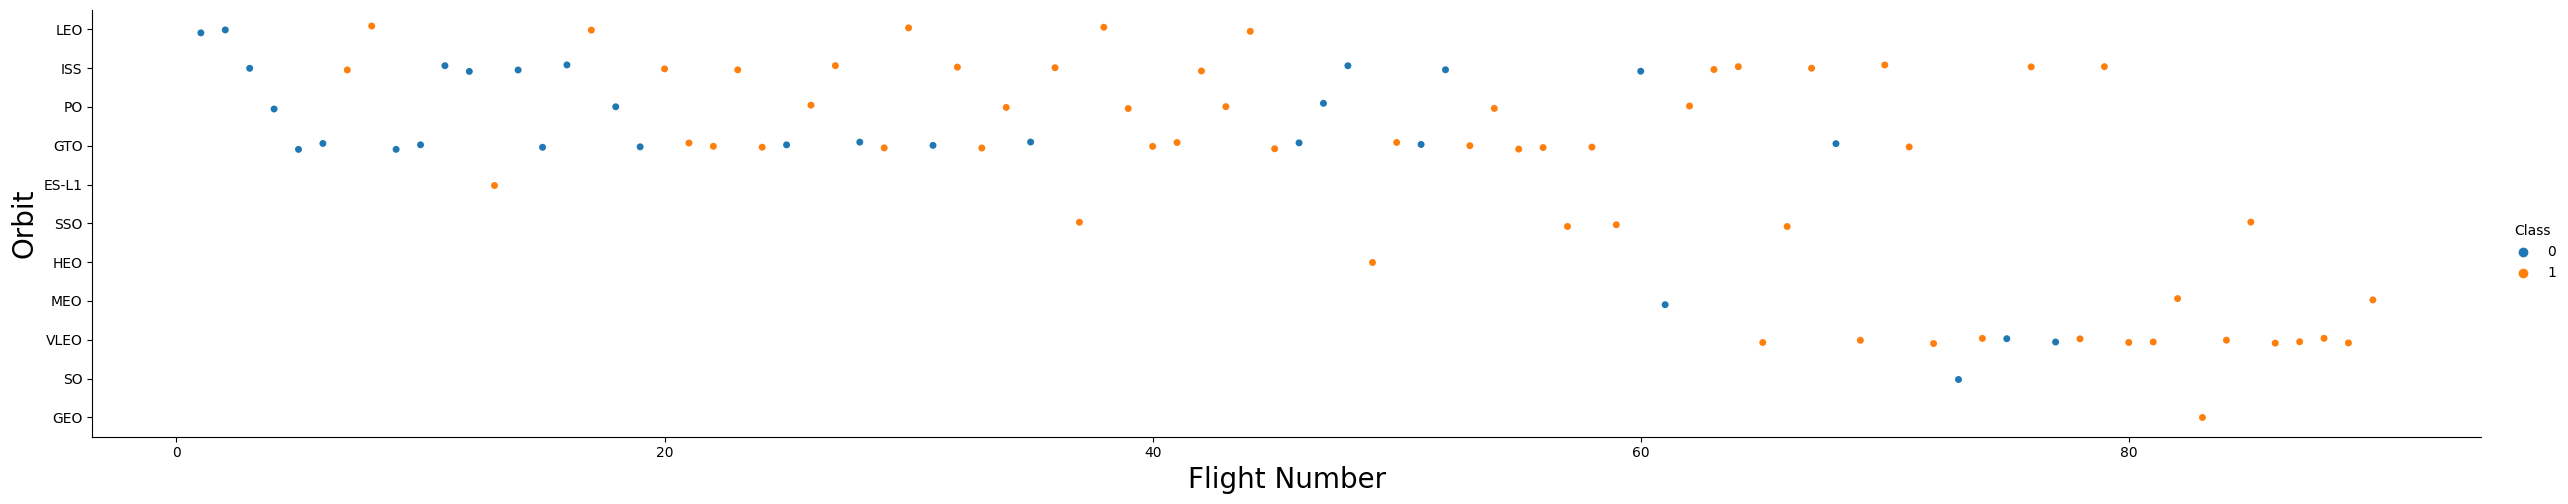

In [101]:
sns.catplot(x= 'FlightNumber', y= 'Orbit', hue = "Class", data = df, aspect= 5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Orbit", fontsize= 20)
plt.show()

In [114]:
#A function to Extract years from the date
year = []
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [115]:
Extract_year(df['Date'])
df['Year'] = year

In [116]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [119]:
#Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df_rate = df.groupby('Year')['Class'].mean().reset_index()

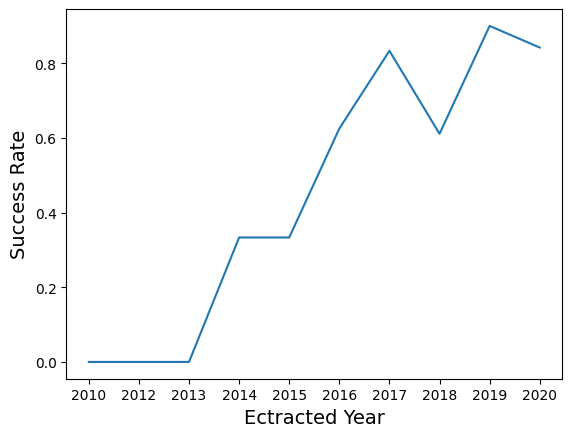

In [122]:
sns.lineplot(x = 'Year', y= 'Class', data = df_rate)
plt.xlabel("Ectracted Year", fontsize = 14)
plt.ylabel("Success Rate", fontsize = 14)
plt.show()

### FEATURES ENGINEERING

In [135]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [132]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
features_one_hot.astype(float)

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [138]:
features_one_hot.to_csv('dataset_part_3.csv', index= False)

### LAUNCH SITES LOCATIONS ANALYSIS WITH FOLIUM

In [139]:
%pip install folium
%pip install wget

Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=c563e9b0bf90ae5dc9d5d7da60105adf66d6419a3569fc2c42d79b0526eb0345
  Stored in directory: /Users/nalini/Library/Caches/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium
import wget
import pandas as pd

In [4]:
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

In [5]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

In [55]:
spacex_df['Launch Site'].unique()

array(['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40'],
      dtype=object)

In [56]:
site = spacex_df[spacex_df['Launch Site'] == 'CCAFS LC-40']

In [71]:
site['class'].value_counts().reset_index()

,index,class
0,0,19
1,1,7


In [6]:
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index= False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [7]:
#Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location= nasa_coordinate, zoom_start = 10)

In [8]:
#Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color = '#d35400', fill= True).add_child(folium.Popup('NASA Johnson Space Center'))
#Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(nasa_coordinate,
                           #Create an icon as a text label 
                           icon = DivIcon(
                               icon_size=(20,10),
                               icon_anchor=(0,0),
                               html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',

                           ))
site_map.add_child(circle)
site_map.add_child(marker)

Create and add folium.Circle and folium.Marker for each launch site 

In [9]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start= 3)

In [10]:
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [11]:
launch_sites_df['Lat']

0    28.562302
1    28.563197
2    28.573255
3    34.632834
Name: Lat, dtype: float64

In [12]:
lat_ = []
long_ = []
for i, lat in enumerate(launch_sites_df['Lat']):
    lat_.append(lat)
for i, long in enumerate(launch_sites_df['Long']):
    long_.append(long)

In [13]:
lat_

[28.56230197, 28.56319718, 28.57325457, 34.63283416]

In [14]:
long_

[-80.57735648, -80.57682003, -80.64689529, -120.6107455]

In [15]:
def coor (lat, long):
    coordinate = []
    for l1, l2 in zip(lat, long):
        coordinate.append((l1,l2))
    return (coordinate)

coordinate = coor(lat_, long_)


In [16]:
coordinate

[(28.56230197, -80.57735648),
 (28.56319718, -80.57682003),
 (28.57325457, -80.64689529),
 (34.63283416, -120.6107455)]

In [18]:
launch_site = []
for i, ls in enumerate(launch_sites_df['Launch Site']):
    launch_site.append(ls)

In [19]:
launch_site

['CCAFS LC-40', 'CCAFS SLC-40', 'KSC LC-39A', 'VAFB SLC-4E']

In [20]:
for c, ls in zip(coordinate, launch_site):
    circle = folium.Circle(c, radius= 1000, color = '#d35400', fill = True).add_child(folium.Popup(ls))
    marker = folium.map.Marker(
        c,
        # Create an icon as a text label
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % ls,
            ))
    site_map.add_child(marker)
    site_map.add_child(circle)
    


In [21]:
site_map
   

## Task 2: Mask the success/failed launches for each site on the map

In [22]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Next, let's create markers for all launch records. If a launch was successful (class = 1), then we use a green marker and if a launch was failed, we use a red marker (class = 0)

Marker clusters can be a good way to simplify a map containing many markers having the same coordinate

In [23]:
marker_cluster = MarkerCluster()

Create a new column in launch_sites dataframe called marker_color to store the marker colors based on the class value

In [226]:
#Apply a function to check the value of 'class' column
#If class = 1, marker_color value will be green
#If class = 0, marker_color value will be red

In [24]:
#Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


For each launch result in spacex_df data frame, add a folium.Marker to marker_cluster

In [25]:
#Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

#For each row in spacex_df data frame
#Create a Marker object with its coordinate
#And customize the Marker's icon property to indicate if this launch was success or failed,
for index, row in spacex_df.iterrows():
    marker = folium.Marker(location=(row['Lat'], row['Long']),
                           icon= folium.Icon(color= 'white',
                                             icon_color= row['marker_color']) )
    marker_cluster.add_child(marker)

site_map


## TASK 3: Calculate the distances between a launch site to its proximities

Adding a MousePosition on the map to get coordinate for a mouse over a point on the map. 

In [26]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position = 'topright',
    separator= ' Long:',
    empty_string='NaN',
    lng_first= False,
    num_digits= 20,
    prefix = 'Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [27]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance (lat1, lon1, lat2, lon2):
    #approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat/2) **2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

Mark down a point on the closet coastline using MousePosition and calculate the distance between the coastline point and the launch site

In [32]:
# # find coordinate of the closet coastline
# distance_coastline = []
# for launch_site_lat, launch_site_lon in zip(spacex_df['Lat'], spacex_df['Long']):
coastline_lat = 28.5636
coastline_lon = -80.56815
launch_site_lat = 28.56342
launch_site_lon = -80.57678
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)


In [33]:
distance_coastline

0.8433178482194135

In [34]:
#Create and add a folium.Marker on your selected closest coastline point on the map
#Display the distance between coastline point and launch site using the icon property

distance_marker = folium.Marker(
        location=(28.5636, -80.56815),
        icon = DivIcon(
            icon_size= (20, 10),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color: #d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline)
        )
    )

In [35]:
site_map.add_child(distance_marker)

Draw a PolyLine between a launch site to the selected coastline point

In [36]:
#Create a 'folium.PolyLine' object using the coastline coordinates and launch site coordinate
lines = folium.PolyLine(locations=[[28.5636, -80.56815], [28.56342, -80.57678]], weight = 1)

In [37]:
site_map.add_child(lines)

In [38]:
#A line between a launch site to its closest city
city_lat = 28.10637
city_lon = -80.63776
distance_city = calculate_distance(city_lat, city_lon, launch_site_lat, launch_site_lon)

In [43]:
distance_marker_1 = folium.Marker(
    location=(city_lat, city_lon),
    icon= DivIcon(
        icon_size= (20,20),
        icon_anchor= (0,0),
        html='<div style="font-size:12; color: #d35400;"><b> %s </b></div>' % "{:10.2f} KM".format(distance_city)
    )
)

In [44]:
site_map.add_child(distance_marker_1)

In [45]:
line_1 = folium.PolyLine(locations=[[city_lat, city_lon], [launch_site_lat, launch_site_lon]],
                         weight = 1)

In [46]:
site_map.add_child(line_1)

In [40]:
#A line between a launch site to its closest railway
railway_lat = 28.57637
railway_lon = -80.5864
distance_railway = calculate_distance(railway_lat, railway_lon, launch_site_lat, launch_site_lon)

In [48]:
distance_marker_2 = folium.Marker(location=(railway_lat, railway_lon),
                                  icon = DivIcon(
                                      icon_size= (20,20),
                                      icon_anchor= (0,0),
                                      html='<div style="font-size: 12; color: #d35400;"><b><%s</b></div>'%"{:10.2f} KM".format(distance_railway)
                                  ))

In [49]:
line_2 = folium.PolyLine(locations=[[railway_lat,railway_lon], [launch_site_lat, launch_site_lon]], weigth = 1)

In [50]:
site_map.add_child(distance_marker_2)
site_map.add_child(line_2)

In [42]:
#A line between a launch site to its closest highway
highway_lat = 28.56949
highway_lon = -80.57202
distance_highway = calculate_distance(highway_lat, highway_lon, launch_site_lat, launch_site_lon)

In [51]:
distance_marker_3 = folium.Marker(location=(highway_lat, highway_lon),
                                  icon = DivIcon(
                                      icon_size= (20,20),
                                      icon_anchor= (0,0),
                                      html = '<div style = "font-size: 12; color: #d35400;"><b>%s</b></div>' %"{:10.2f} KM".format(distance_highway)
                                  ))

In [52]:
line_3 = folium.PolyLine(locations=[[highway_lat, highway_lon], [launch_site_lat, launch_site_lon]], weight = 1)

In [53]:
site_map.add_child(distance_marker_3)
site_map.add_child(line_3)

In [72]:
spacex_df = pd.read_csv("spacex_launch_dash.csv")

In [73]:
spacex_df['Launch Site'].unique()

array(['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40'],
      dtype=object)

In [74]:
site_data = spacex_df[spacex_df['Launch Site']== 'CCAFS LC-40']

In [77]:
site_data['class'].dtype

dtype('int64')

In [75]:
site_data['class'].value_counts().reset_index()

,index,class
0,0,19
1,1,7


### MACHINE LEARNING PREDICTION

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 


In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [7]:
Y = data['Class'].to_numpy()

In [8]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [8]:
transfrom = preprocessing.StandardScaler()

In [22]:
X = transfrom.fit_transform(X)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [24]:
print('Test set: ', X_test.shape, Y_test.shape)
print('Train set: ', X_train.shape, Y_train.shape)

Test set:  (18, 83) (18,)
Train set:  (72, 83) (72,)


In [25]:
### Task 4
parameters = {'C': [0.01, 0.1, 1],
                'penalty': ['l2'],
                'solver': ['lbfgs']}

In [26]:
lr = LogisticRegression()

In [27]:
logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [28]:
print("tuned hpyerparameters: (best parameters)", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)

tuned hpyerparameters: (best parameters) {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.8464285714285713


In [39]:
accuracy_lr = logreg_cv.score(X_test, Y_test)
print('Accuracy on the test data: ', accuracy)

Accuracy on the test data:  0.8333333333333334


In [29]:
yhat = logreg_cv.predict(X_test)

In [30]:
yhat_prob = logreg_cv.predict_proba(X_test)

In [31]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat, pos_label = 0)

0.5

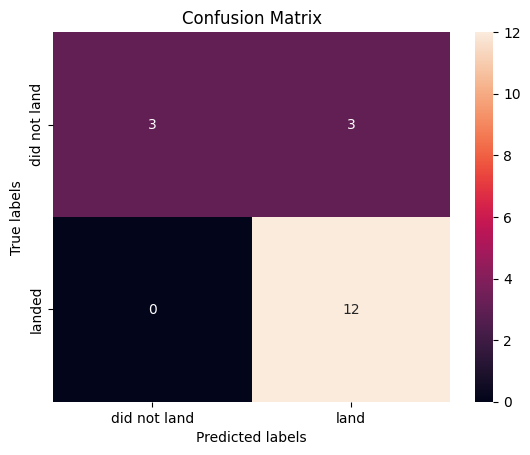

In [32]:
plot_confusion_matrix(Y_test, yhat)

In [33]:
#Task 6: create a support vector machine 
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
                'C': np.logspace(-3, 3, 5),
                'gamma': np.logspace (-3, 3, 5)}
svm = SVC()

In [34]:
gs = GridSearchCV(svm, parameters, scoring = 'accuracy',cv = 10)

In [36]:
svm_cv = gs.fit(X_train, Y_train)

In [37]:
print("tuned hpyerparameters: (best parameters)", svm_cv.best_params_)
print("accuracy: ", svm_cv.best_score_)

tuned hpyerparameters: (best parameters) {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy:  0.8482142857142856


In [38]:
#Task 7: Calculate the accuracy on the test data using the method score:
accuracy = svm_cv.score(X_test, Y_test)
print("Accuracy on the test data: ",accuracy)

Accuracy on the test data:  0.8333333333333334


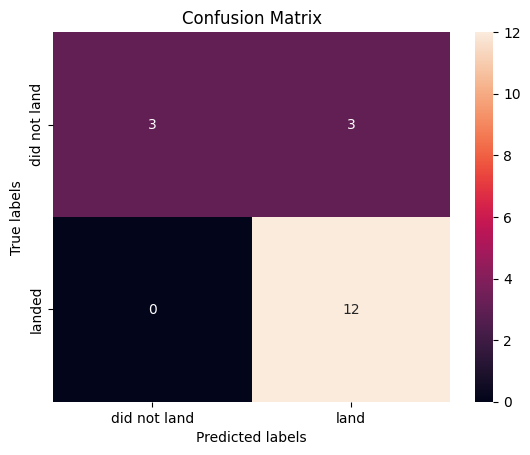

0.5

In [56]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)
js = jaccard_score(Y_test, yhat, pos_label = 0)
js

In [41]:
#Task 8: Create a decision tree classifier
parameters = {'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [2*n for n in range (1, 10)],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [42]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)

In [43]:
tree_cv.fit(X_train, Y_train)

/Users/nalini/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nalini/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nalini/.local/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/nalini/.local/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users/na

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [44]:
print("tuned hpyerparameters: (best parameters)", tree_cv.best_params_)
print("accuracy:", tree_cv.best_score_)

tuned hpyerparameters: (best parameters) {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy: 0.8892857142857145


In [45]:
accuracy = tree_cv.score(X_test, Y_test)
print("Accuracy on test set: ", accuracy)

Accuracy on test set:  0.7777777777777778


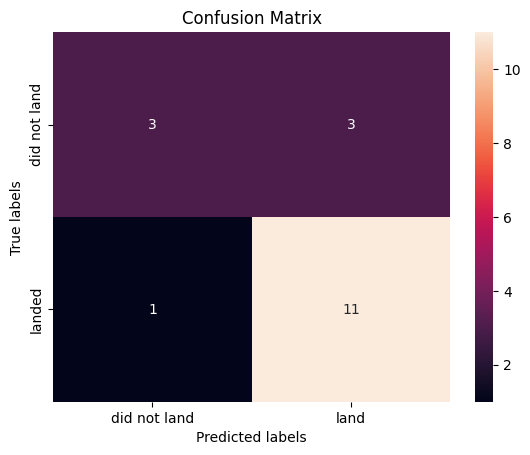

0.42857142857142855

In [57]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)
js = jaccard_score(Y_test, yhat, pos_label = 0)
js

In [47]:
#Task 10 : Create a k nearest neighbors
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'p': [1,2]}

KNN = KNeighborsClassifier()

In [48]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)

In [49]:
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [50]:
print("tuned hpyerparameters: (best parameters)", knn_cv.best_params_)
print("accuracy: ", knn_cv.best_score_)

tuned hpyerparameters: (best parameters) {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy:  0.8482142857142858


In [53]:
accuracy = knn_cv.score(X_test, Y_test)
print(accuracy)

0.8333333333333334


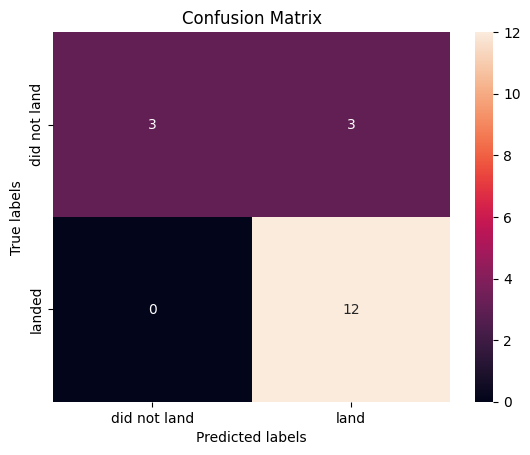

0.5

In [58]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)
js = jaccard_score(Y_test, yhat, pos_label = 0)
js